In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

8


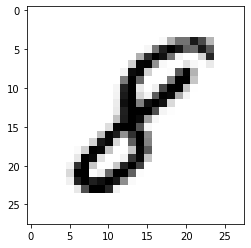

In [5]:
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255
x_test /= 255

In [10]:
print('x_train_shape', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train_shape (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(28, kernel_size=(3, 3), input_shape = input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.2248 - accuracy: 0.9317
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0619 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0455 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0376 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0300 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0259 - accuracy: 0.99110s - loss: 0.0255 - 
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0228 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 10/10
1875/1875 [=====================

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0638 - accuracy: 0.9847


[0.06381233781576157, 0.9847000241279602]

3


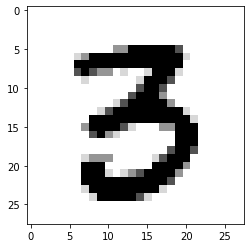

In [23]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [24]:
#============================================

In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
len(train_labels)

60000

In [28]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
#Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [36]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2543 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1040 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0376 - accuracy: 0.9890


In [37]:
#Using the model to make predictions

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([5.1800181e-10, 1.0980471e-10, 1.6841612e-06, 1.6709540e-05,
       1.2470733e-13, 5.0364157e-09, 8.9357751e-16, 9.9998093e-01,
       3.9269928e-08, 6.2550168e-07], dtype=float32)

In [38]:
predictions[0].argmax()

7

In [39]:
test_labels[0]

7

In [40]:
#Evaluating the model on new data

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9805
test_acc: 0.9804999828338623


In [41]:
#Data representations for neural networks
#Scalars (rank-0 tensors)

import numpy as np
x = np.array(12)

In [42]:
x

array(12)

In [43]:
#Vectors (rank-1 tensors)

x = np.array([12, 3, 6, 14, 7])

In [44]:
x

array([12,  3,  6, 14,  7])

In [45]:
x.ndim

1

In [46]:
#Matrices (rank-2 tensors)


x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [47]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [48]:
x.ndim

2

In [49]:
#Rank-3 and higher-rank tensors


x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],x.
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [50]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [51]:
x.ndim

3

In [52]:
#Key attributes

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [53]:
train_images.ndim

3

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
train_images.dtype

dtype('uint8')

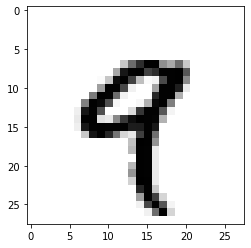

In [56]:
#Displaying the fourth digit

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [57]:
train_labels[4]

9

In [58]:
#Manipulating tensors in NumPy

my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [59]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [60]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [61]:
#The notion of data batches

batch = train_images[:128]

In [62]:
batch = train_images[128:256]

In [63]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [64]:
#Element-wise operations

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

In [65]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            
    return x

In [66]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
    
print('Took: {0:.2f} s'.format(time.time() - t0))

Took: 0.01 s


In [67]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)

print('Took: {0:.2f} s'.format(time.time() - t0))

Took: 3.07 s


In [69]:
#Broadcasting

import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [70]:
y = np.expand_dims(y, axis=0)

In [71]:
Y = np.concatenate([y] * 32, axis=0)

In [72]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
            
    return x

In [73]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [74]:
#Tensor product

x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [75]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [76]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
            
    return z

In [77]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [78]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
            
    return z

In [79]:
#Tensor reshaping


train_images = train_images.reshape((60000, 28 * 28))

In [80]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

x.shape

(3, 2)

In [81]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [83]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [84]:
#The gradient tape in TensorFlow

import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [85]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [86]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [87]:
#A simple Dense class

import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval = 1e-1)
        self.W = tf.Variable(w_initial_value)
        
        
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]

In [88]:
#A simple Sequential class

class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [90]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size = 512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

assert len(model.weights) == 4

In [91]:
#A batch generator

import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [92]:
#Running one training step

def one_training_step(models, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [93]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [94]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))